## Problem 1: API Integration & Digit Recognition (40 points)


*Train model*

In [13]:
#download dataset and relevant tools

import numpy as np
import matplotlib.pyplot as plt
import random

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import to_categorical

import tensorflow.keras.utils as np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization





In [14]:
#load and split data from mnist into training and test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#preprocess training data and labels

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255     #normalisation
X_test /= 255

nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


In [15]:
#CNN model as seen in class


model = Sequential()

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(BatchNormalization(axis=-1))
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))                        # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))
model.add(BatchNormalization(axis=-1))
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values
model.add(convLayer04)
model.add(Flatten())                                 # Flatten final output matrix

# Fully Connected Layer 5
model.add(Dense(512))                                # 512 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))                        # activation

# Fully Connected Layer 6
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))                     # softmax activation

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 10, 10, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │              

 Total params: 597,738 (2.28 MB)

 Trainable params: 596,330 (2.27 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [16]:
#data augmentation

gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()



In [17]:
#feed data into training model in batches (larger batch higher accuracy for actual)
train_generator = gen.flow(X_train, Y_train, batch_size=256)
test_generator = test_gen.flow(X_test, Y_test, batch_size=256)
#training model
model.fit(train_generator, steps_per_epoch=60000//256, epochs=5, verbose=1,
                    validation_data=test_generator, validation_steps=10000//256)

Epoch 1/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 129s 532ms/step - accuracy: 0.8821 - loss: 0.3704 - val_accuracy: 0.2014 - val_loss: 4.2425
Epoch 2/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9844 - loss: 0.0482 - val_accuracy: 0.1992 - val_loss: 4.2343
Epoch 3/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 142s 556ms/step - accuracy: 0.9858 - loss: 0.0481 - val_accuracy: 0.7920 - val_loss: 0.9247
Epoch 4/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9922 - loss: 0.0255 - val_accuracy: 0.7794 - val_loss: 0.9697
Epoch 5/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 126s 537ms/step - accuracy: 0.9874 - loss: 0.0401 - val_accuracy: 0.9890 - val_loss: 0.0366


In [18]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9887 - loss: 0.0370
Test score: 0.03650234267115593
Test accuracy: 0.9890000224113464


***Stimulated API to get MNIST img***

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


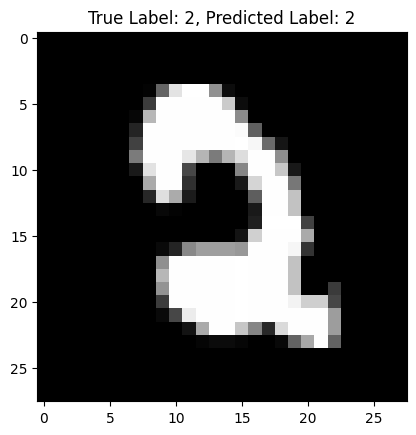

In [19]:
# Stimulated API function to get a random MNIST image
def get_random_mnist_image():

    # Select a random image
    random_index = np.random.randint(0, X_test.shape[0])
    random_image = X_test[random_index]
    true_label_index = np.argmax(Y_test[random_index])  # Get the index of the true label

    return random_image, true_label_index

# Get a random image and its true label index
random_image, true_label_index = get_random_mnist_image()

#reshape
random_image_for_prediction = np.expand_dims(random_image, axis=0)

# Predict
predicted_label = np.argmax(model.predict(random_image_for_prediction))

# Display the image, true label, and predicted label
plt.imshow(random_image.squeeze(), cmap='gray')
plt.title(f'True Label: {true_label_index}, Predicted Label: {predicted_label}')
plt.show()

## Problem 2: Hidden Layer Visualization & Analysis

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_464']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


Shape of conv: (26, 26, 32)


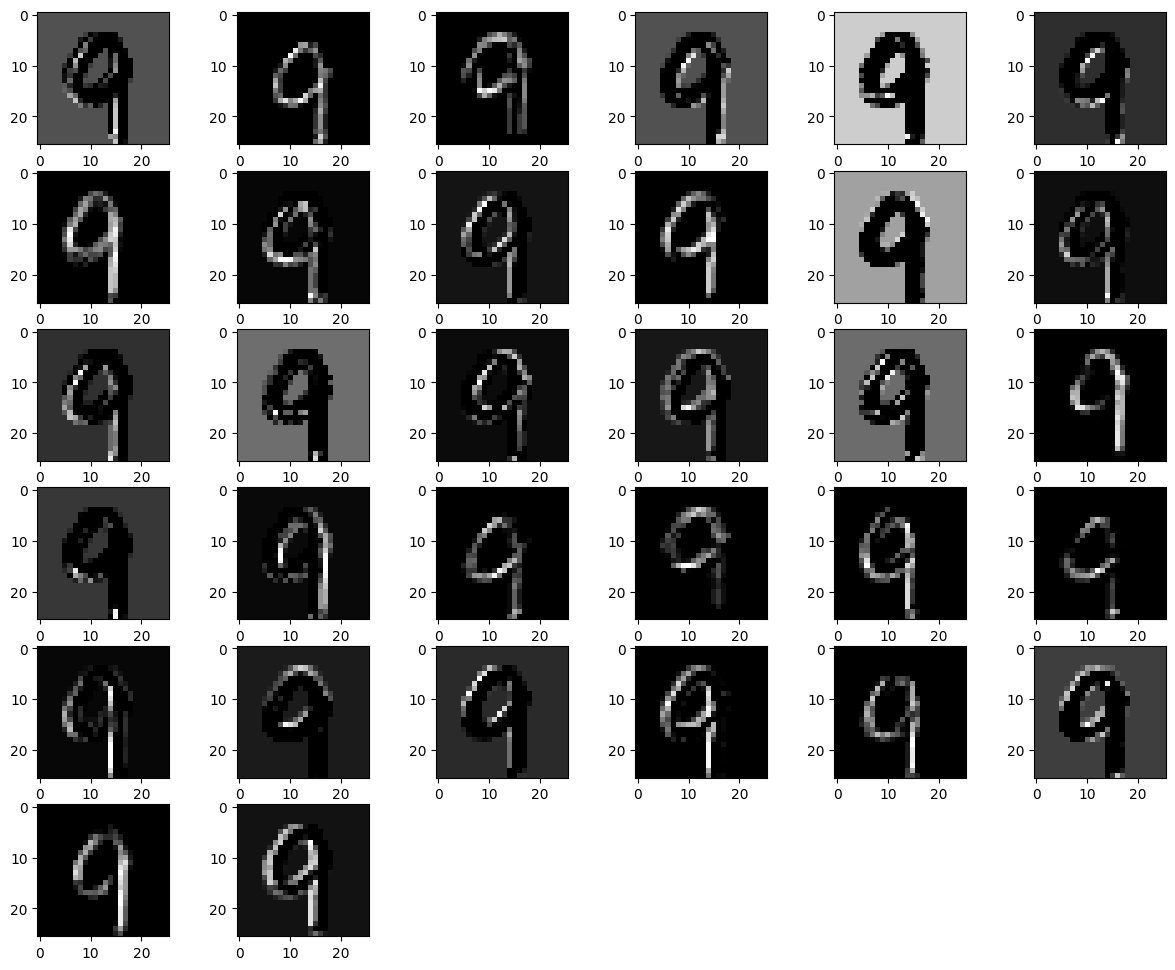

In [20]:
from keras import backend as K
import tensorflow as tf


def visualize(layer):
    dummy_input = np.random.rand(1, 28, 28, 1)
    # Call the model with a dummy input to build it
    model.predict(dummy_input)

    # Get the name of the last layer (e.g., 'dense_2')
    last_layer_name = model.layers[-1].name

    grad_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=[layer.output, model.get_layer(last_layer_name).output]
    )

    # Get a random image using get_random_mnist_image earlier
    img, _ = get_random_mnist_image()
    img = np.expand_dims(img, axis=0) #process for keras


    convolutions = grad_model.predict(img)[0]
    convolutions = np.squeeze(convolutions)

    print ('Shape of conv:', convolutions.shape)

    m = convolutions.shape[2]
    n = int(np.ceil(np.sqrt(m)))

    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(15,12))
    for i in range(m):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[:,:,i], cmap='gray')

visualize(convLayer01)

*Analysis & Neurobiological Discussion:*

Discuss what kinds of features the early convolutional layers
appear to detect (e.g., edges, corners).
Compare these features with what is known about the receptive
fields in the human visual cortex (for example, simple cells in
V1)


**Response**

The earlier convolutional layers in the CNN appear to detect simpler and more intuitive features, such as edges, textures, object boundaries, and changes in color. These features correspond to the basic features of an image, and in the case of MNIST numbers, the outline of the number is still visible in the visualizations of the early layers.

As the network progresses to deeper layers, the features become increasingly complex and abstract. The outline of the digits fades, and the filter images often look more like pixelated images or block-like structures. This suggests that the model is moving from detecting simple shapes and edges in the early layers to capturing more intricate and high-level representations in the deeper layers, such as complex patterns, textures, or parts of the object.

This process mirrors the functioning of the primary visual cortex (V1) and its hierarchical structure. In the human visual cortex, simple cells in V1 are highly sensitive to oriented lines and edges, firing most strongly when a line aligns with their specific receptive field orientation. This behavior can be observed in the filters of the first convolutional layer in the CNN, where each filter captures a specific part of an edge, some of which are aligned in particular orientations—like horizontal, vertical, or at certain angles.

The hierarchical nature of both the CNN and the visual cortex is quite similar. In the brain, information from V1 is passed along to higher visual areas (V2-V5), where more complex representations—such as color, motion, and object recognition—are formed. In CNNs, the progression from the 2nd to 4th convolutional layers likely involves the processing of more complex features (such as color or shape). However, due to the limitations of the visualization, it becomes difficult to interpret the exact representations learned by the deeper layers, often resulting in visualizations that look  abstract, such as blocks of black and white.

CNNs are trained on data, refining their ability to capture visual features and learn representations. On the other hand, the human visual cortex has been shaped by millions of years of evolution, where environmental factors and survival needs may have played a role in prioritizing certain visual features (e.g., detecting motion or faces). These evolutionary factors have influenced the development of the brain's capacity to process and interpret visual stimuli, thus making it different from CNNs.

In conclusion, both CNN and the visual cortex share the principle of building sophisticated visual understanding in a bottom-up manner. Simple visual features, such as edges and textures, are detected first, and as information is passed through subsequent layers, these basic features are combined and consolidated into higher-level, more complex representations.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Original prediction (separate check): 6


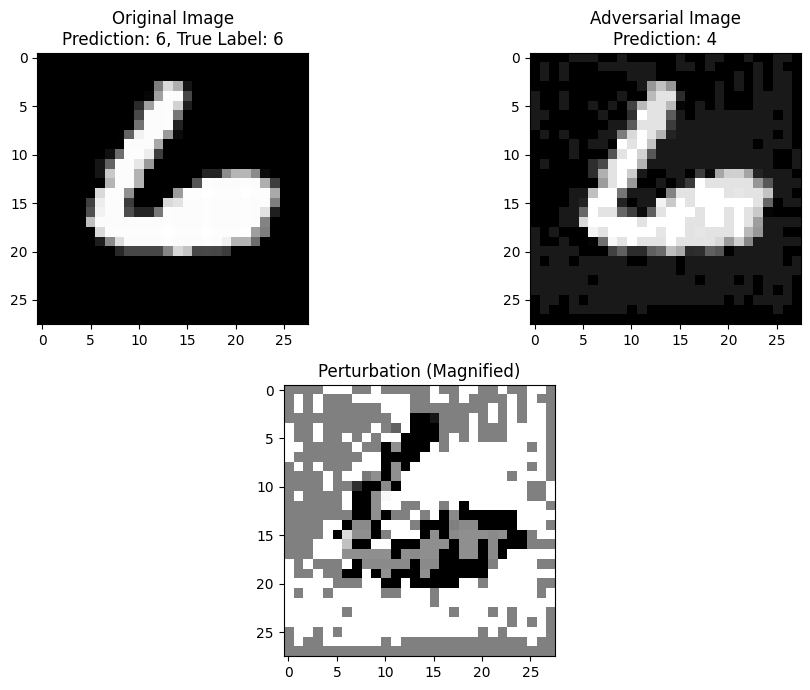

In [21]:
def generate_adversarial_example(model, image, true_label, epsilon=0.1):

    # Convert image to tensor within the function
    image = tf.convert_to_tensor(image)
    original_label = tf.convert_to_tensor([true_label])

    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)
        loss = tf.keras.losses.sparse_categorical_crossentropy(original_label, prediction)

    gradient = tape.gradient(loss, image)
    perturbation = epsilon * tf.sign(gradient)
    adv_image = image + perturbation
    adv_image = tf.clip_by_value(adv_image, 0.0, 1.0)  # Ensure valid pixel values

    original_prediction = np.argmax(model.predict(image))
    adversarial_prediction = np.argmax(model.predict(adv_image))

    return adv_image, original_prediction, adversarial_prediction

# Get a random image and its true label
random_image, true_label = get_random_mnist_image()
random_image_for_model = np.expand_dims(random_image, axis=0)

# Generate an adversarial example
adv_image, original_prediction, adversarial_prediction = generate_adversarial_example(
    model, random_image_for_model, true_label, epsilon=0.1
)

original_prediction = np.argmax(model.predict(random_image_for_model))
print(f"Original prediction (separate check): {original_prediction}")

# Display the results
plt.figure(figsize=(10, 7))  # Increase figure height to accommodate perturbation

# Original image
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, first subplot
plt.imshow(random_image_for_model.squeeze(), cmap='gray')  # Use random_image_for_model
plt.title(f'Original Image\nPrediction: {original_prediction}, True Label: {true_label}')

# Adversarial image
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, second subplot
plt.imshow(adv_image.numpy().squeeze(), cmap='gray')
plt.title(f'Adversarial Image\nPrediction: {adversarial_prediction}')

# Perturbation
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second subplot (spanning full width)
perturbation = adv_image - tf.convert_to_tensor(random_image_for_model)  # Calculate perturbation correctly
plt.imshow(perturbation.numpy().squeeze(), cmap='gray')
plt.title('Perturbation (Magnified)')

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()


*Small Perturbation, Big Effects: Implications on Machine Learning and Neuroscience Research*

As demonstrated above, even a small perturbation (epsilon = 0.1) can significantly alter the predictions of a machine learning model that boasts high accuracy—up to 99%. A seemingly trivial change can cause a model to misclassify an MNIST digit, such as misidentifying a "3" as an "8," despite little visible difference between the original and perturbed images. This phenomenon reveals a fundamental
vulnerability in machine learning models, where small disturbances at lower layers can amplify and disproportionately impact higher, more abstract features. I imagine that the  hierarchical structure of convolutional neural networks is a critical factor in this behavior. As input data passes through the layers, initial features are combined and refined into increasingly complex representations, making it challenging to pinpoint how small changes are affecting the model's decision-making. Thus, a "small" change will lead to the model thinking that "3" is "8", and we are quite clueless to exactly why.

A notable comparison can be drawn to how human perception can be easily tricked by optical illusions. Just as a slight clever modification in an image can cause a human observer to misperceive an object, small perturbations in the input data can lead the model to misclassify it, despite there being no obvious change.

In my opinion, the most significant implication for ML is in terms of safety, especially as AI technologies become more embedded in systems such as facial recognition and autonomous vehicles. These systems rely heavily on accurate image classification, but the discovery of their vulnerability to adversarial attacks raises concerns about their robustness. A tiny, carefully crafted perturbation could cause the model to misidentify crucial information, jeopardizing safety and reliability. This underscores the importance of developing resilient models that can withstand such adversarial inputs/attacks, particularly the AI fervor continues to be high, and the push for adoption of AI strong.

From a neuroscience perspective, the phenomenon raises intriguing questions about the robustness of human perception. How does the brain filter out noise and focus on meaningful features? As we discussed in class, even in a noisy room, we can hear our name from afar. Unlike machine learning models, the human brain is not trained on data but has evolved mechanisms for interpreting ambiguous or distorted/noisy input. Investigating how the brain handles small changes in stimuli could inspire new approaches to improve the robustness of machine learning systems, perhaps by mimicking neurological principles that help humans stay resilient to such perturbations. Understanding both the limitations and strengths of human perception could provide valuable insights for building more robust AI models, blending the best of both human(biological) and artificial intelligence.